<a href="https://www.kaggle.com/code/codekalimi/evaluating-a-model-techniques?scriptVersionId=140255382" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-example/heart-disease.csv


# There are 3 main ways to evaluate a model prediction
1. Built in `score()` method
2. By **Scoring Parameters**
3. By `Metric` function

## 1. Let's evaluate a model with the `score()` method

In [2]:
heart_diseas_df = pd.read_csv("/kaggle/input/heart-disease-example/heart-disease.csv")
heart_diseas_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Check the data before model fitting
heart_diseas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
len(heart_diseas_df)

303

In [5]:
# split into feature and target
X = heart_diseas_df.drop("target", axis=1)
y = heart_diseas_df["target"]

In [6]:
X.shape, y.shape

((303, 13), (303,))

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
# fit the model
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [10]:
# Lets evaluate with score() method
rfc.score(X_test, y_test)

0.8524590163934426

### Let's try with regression problem

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [12]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [13]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [14]:
# split into feature and target
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

In [15]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr.score(X_test,y_test)

0.8077682556045105

# 2. Now Let's evaluate model using **`Scoring Parameters`**

In [17]:
from sklearn.model_selection import cross_val_score

# we'll use classification problem
X = heart_diseas_df.drop("target", axis=1)
y = heart_diseas_df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
cross_val_score(rfc, X, y)

array([0.81967213, 0.90163934, 0.80327869, 0.81666667, 0.76666667])

### So the first difference is `score()` method returns only single value while `cross_val_score()` method returns an array of values

In [18]:
# lets compare
rfc_score = rfc.score(X_test, y_test)
rfc_cross_val_score = np.mean(cross_val_score(rfc, X, y))
rfc_score, rfc_cross_val_score

(0.8032786885245902, 0.8282513661202187)

### let's see other classification model's evaluation metrics
1. Accuracy
2. Area under ROC Curve
3. Confusion Matrix
4. Classification Report

In [19]:
# 1. accuracy
rfc_cross_val_score = cross_val_score(rfc, X, y)
np.mean(rfc_cross_val_score)

0.8248087431693989

In [20]:
print(f"The Cross-val-score accuracy is: {np.mean(rfc_cross_val_score) * 100:.2f}%")

The Cross-val-score accuracy is: 82.48%


In [21]:
# AUC (ROC Curve)
# True positive => model predict 1 when truth is 1
# True negetive => model predict 0 when truth is 0
# False positive => model predict 1 when truth is 0
# False negetive => model predict 0 when truth is 1

In [22]:
from sklearn.metrics import roc_curve

# meke prediction with probabilites
y_probs = rfc.predict_proba(X_test)
y_probs[:10]

array([[0.25, 0.75],
       [0.54, 0.46],
       [0.04, 0.96],
       [0.7 , 0.3 ],
       [0.25, 0.75],
       [0.03, 0.97],
       [0.  , 1.  ],
       [0.69, 0.31],
       [0.01, 0.99],
       [0.91, 0.09]])

In [23]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.75, 0.46, 0.96, 0.3 , 0.75, 0.97, 1.  , 0.31, 0.99, 0.09])

In [24]:
# now calculte false positive rate(fpr), true positive rate(tpr) and threshold
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# check the false poitive rate
fpr

array([0.        , 0.        , 0.        , 0.03571429, 0.03571429,
       0.03571429, 0.03571429, 0.03571429, 0.03571429, 0.03571429,
       0.07142857, 0.07142857, 0.07142857, 0.10714286, 0.10714286,
       0.17857143, 0.17857143, 0.21428571, 0.25      , 0.25      ,
       0.28571429, 0.35714286, 0.5       , 0.57142857, 0.57142857,
       0.60714286, 0.67857143, 0.92857143, 1.        ])

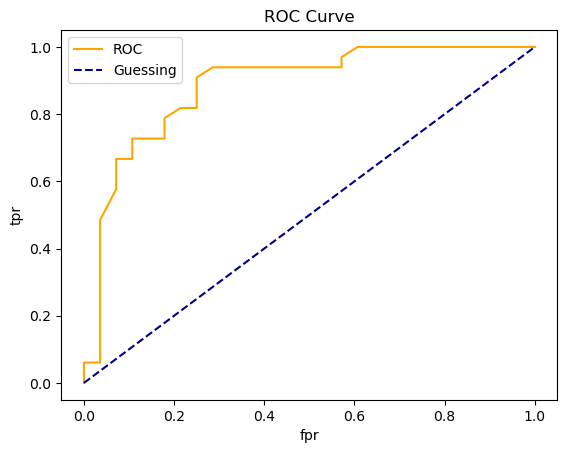

In [25]:
# create a function for ploting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the fpr and tpr of a model
    """
    # plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")
    
    plt.xlabel("fpr")
    plt.ylabel("tpr")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [26]:
from sklearn.metrics import roc_auc_score

In [27]:
roc_auc_score(y_test, y_probs_positive)

0.8841991341991342

### Confusion metrics
A confusion matrix is a quick way to compare the lables a model predicts and the actual lables it was supposed to predict
In short, giving you an ida of where the model is getting confused

In [28]:
# take true labels and prediction
from sklearn.metrics import confusion_matrix
y_preds = rfc.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[21,  7],
       [ 5, 28]])

In [29]:
# visualize confusion matrix with crosstab(compare two different things)
pd.crosstab(y_test, y_preds, rownames=["Acutal Label"], colnames=["Predicted Labels"])

Predicted Labels,0,1
Acutal Label,,
0,21,7
1,5,28


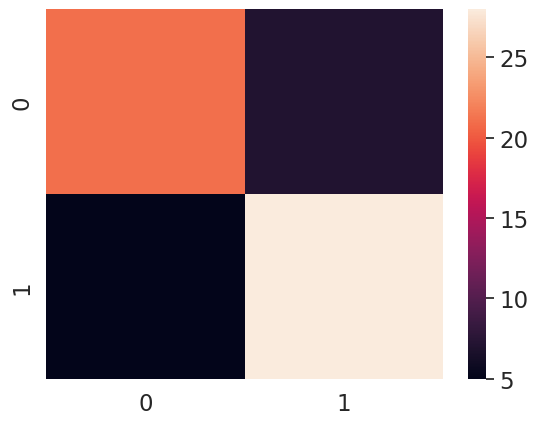

In [30]:
# Make our confusion matrix more with seaborn.heatmap
import seaborn as sns

sns.set(font_scale=1.5)

conf_matrix = confusion_matrix(y_test, y_preds)
sns.heatmap(conf_matrix);

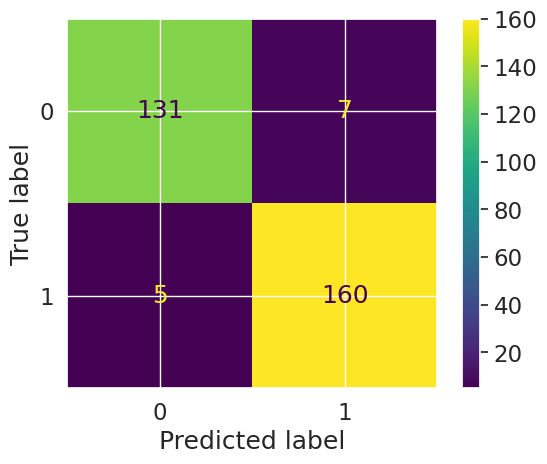

In [31]:
# confusino metrics using sklearn lates ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=rfc, X=X, y=y);

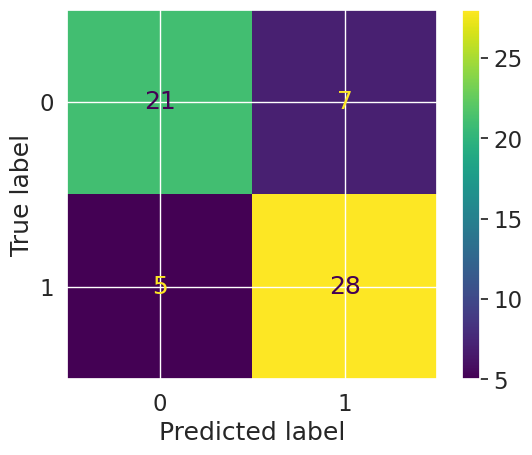

In [32]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds);

### From Classification report

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78        28
           1       0.80      0.85      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



## Regression model evaluation metrics
1. R2-square
2. MAE
3. MSE

In [34]:
# split data from housing_df
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [36]:
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)

0.8207028575625122

In [37]:
y_pred = rfr.predict(X_test)
y_pred[:10]

array([1.59727  , 3.7070618, 2.4165502, 2.30196  , 1.66764  , 1.08381  ,
       1.77539  , 2.60983  , 2.5055801, 1.928051 ])

In [38]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8207028575625122

In [39]:
# MAE
from sklearn.metrics import mean_absolute_error
y_pred = rfr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mae

0.3201906192829459

In [40]:
y_pred[:10]

array([1.59727  , 3.7070618, 2.4165502, 2.30196  , 1.66764  , 1.08381  ,
       1.77539  , 2.60983  , 2.5055801, 1.928051 ])

In [41]:
np.array(y_test[:10])

array([1.788, 3.401, 2.545, 2.2  , 1.63 , 0.913, 1.821, 2.391, 2.264,
       2.5  ])

In [42]:
# MSE
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

0.24183726689740312

## Evaluating model using `scoring` parameter 

what is happeing behind the model evaluatin is that - your prediction vs it should predict score

### for classification problem

In [43]:
X = heart_diseas_df.drop("target", axis=1)
y = heart_diseas_df["target"]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [45]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [46]:
cv_rfc = cross_val_score(rfc, X, y)
cv_rfc.mean()

0.8346994535519124

In [47]:
cv_rfc_precision = cross_val_score(rfc, X, y, scoring="precision")
cv_rfc_precision.mean()

0.8358252647626461

In [48]:
cv_rfc_recall = cross_val_score(rfc, X, y, scoring="recall")
cv_rfc_recall.mean()

0.8484848484848484

### Regression

In [49]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [50]:
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [51]:
cv_rfr = cross_val_score(rfr, X, y)
cv_rfr.mean()

0.652337077882971

In [52]:
# cv_rfr_precision = cross_val_score(rfr, X, y, scoring="mean_squared_error")
# cv_rfr_precision.mean()

In [53]:
from sklearn.metrics import get_scorer_names

In [54]:
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [55]:
cv_rfr_mae = cross_val_score(rfr, X, y, scoring="neg_mean_absolute_error")
cv_rfr_mae.mean()

-0.46425875557170554

## Evaluating model by `metric function`

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# 5. Improving Model 

first prediction = baseline prediction.

first model = baseline model.

 From Data perspective of data
  1. Could we collect more data?
  2. Could we improve our data ? (Feature Engineering)
  
 From a Model perspective:
  1. Is there a better model could we use?
  2. Could we improve the current model? (Hyperparameter Tuning)
  
  Pattern we find often refers to Data Parameters
  Parameters = model finds these petterns in data
  Hyperparameters = settings on a model you can adjust to (potentially) improve it's ability   to find patterns

In [57]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [58]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Three ways to adjust hyperparameters
1. By Hand (we manually check different parameters, apply and test)
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

## 1. Hyperparameters tuning by Hand

 3 sets => training, validation, test

In [59]:
def evaluate_preds(y_true, y_pred):
    """
    Performs evaluation comparison on y_true vs y_pred labels on a classification problem.
    """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision * 100:.2f}")
    print(f"Recall: {recall * 100:.2f}")
    print(f"F1 Score: {f1:.2f}")

In [60]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [61]:
# shuffled the data
heart_diseas_shuffled = heart_diseas_df.sample(frac=1)
# heart_diseas_shuffled
# lets split data by hand into train, validation and test
X = heart_diseas_shuffled.drop("target", axis=1)
y = heart_diseas_shuffled["target"]

train_split = round(0.7 * len(heart_diseas_shuffled))
valid_split = round(train_split + 0.15 * len(heart_diseas_shuffled))
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

In [62]:
# lets fit model with default parameters
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [63]:
# lets predict
y_pred = rfc.predict(X_test)

In [64]:
# evaluate_preds(y_valid, y_pred)